<a href="https://colab.research.google.com/github/Harjot4026/Classification-with-an-Academic-Success-Dataset/blob/main/Academic_Success.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies install if needed



In [ ]:
!pip install scikit-learn catboost xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.6 MB/s eta 0:00:00


# Understanding Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.stats import t,f,normaltest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Academic Success/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Academic Success/test.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


# separating int, float and Categorical

In [ ]:
df['Application mode'].describe()

count    76518.000000
mean        16.054419
std         16.682337
min          1.000000
25%          1.000000
50%         17.000000
75%         39.000000
max         53.000000
Name: Application mode, dtype: float64

In [ ]:
df['Application mode'].value_counts()

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

In [ ]:
df['Application mode'].unique()

array([ 1, 17, 39, 44,  7, 18, 15, 16, 53, 43, 51, 42, 10,  5, 12, 27,  2,
       26,  4, 35,  9,  3])

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [ ]:
df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']]

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [ ]:
df = df.drop('id', axis = 1)

In [ ]:

num_int_col = ['Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
               'Curricular units 1st sem (approved)','Curricular units 1st sem (without evaluations)',	'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)',
               'Curricular units 2nd sem (evaluations)',	'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)']
num_float_col = ['GDP','Inflation rate','Unemployment rate','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Previous qualification (grade)','Admission grade']

In [ ]:
# All columns in the dataframe
all_columns = df.columns.tolist()

# Columns to exclude
exclude_columns = num_int_col + num_float_col

# Categorical columns
cat_col = [col for col in all_columns if col not in exclude_columns]

cat_col

['id',
 'Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

In [ ]:
df['Marital status'].describe()

count    76518.000000
mean         1.111934
std          0.441669
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: Marital status, dtype: float64

In [ ]:
df['Marital status'].value_counts()

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

In [ ]:
df['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

## Analysing the float columns

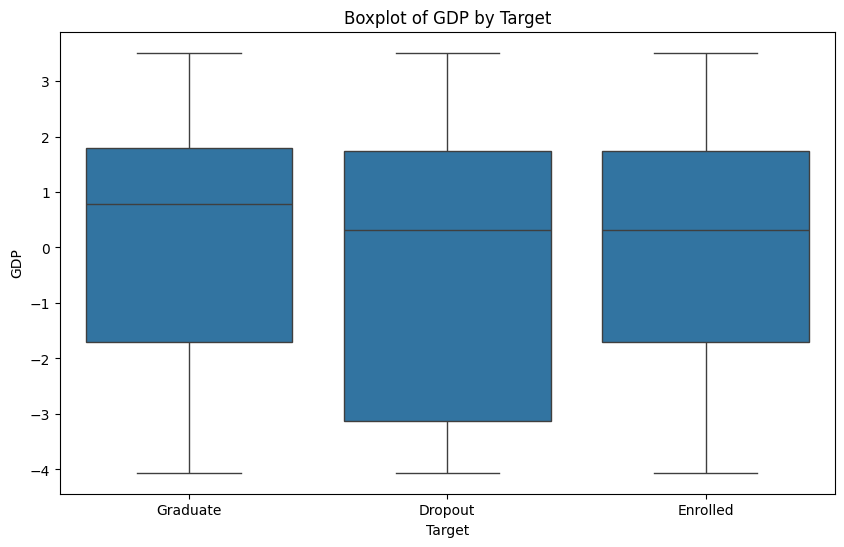

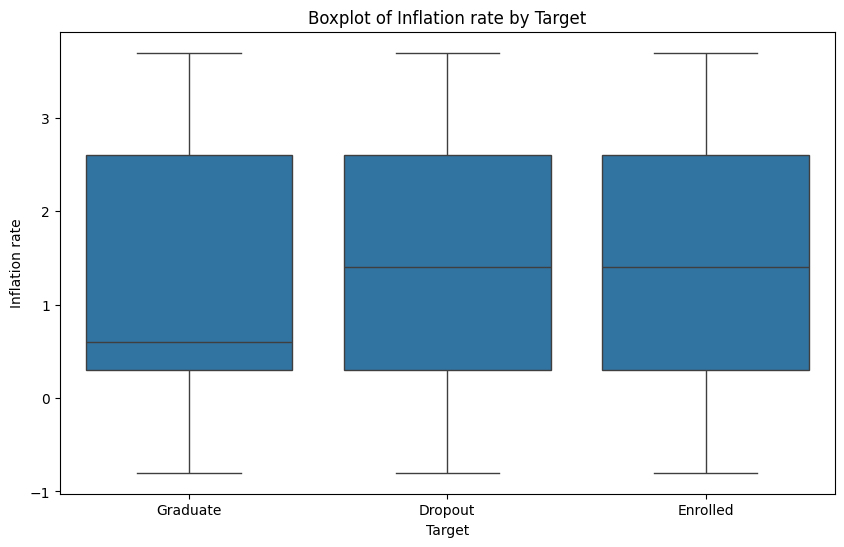

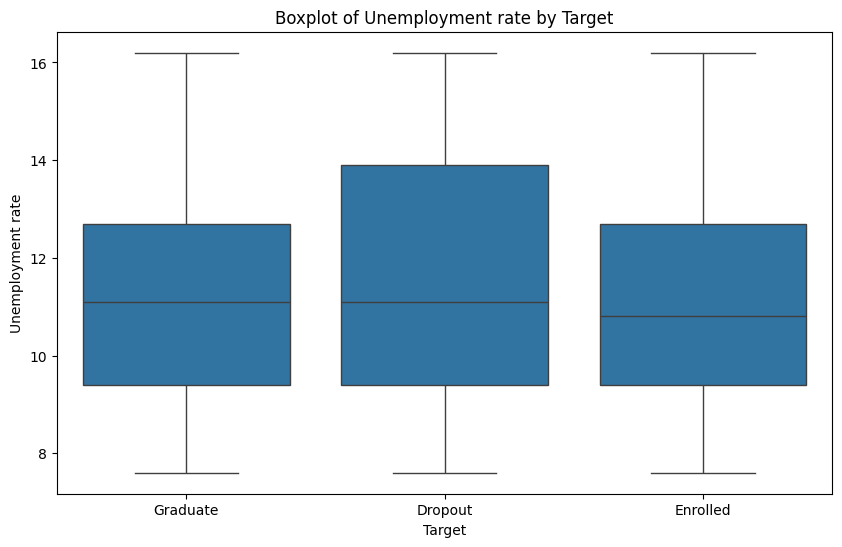

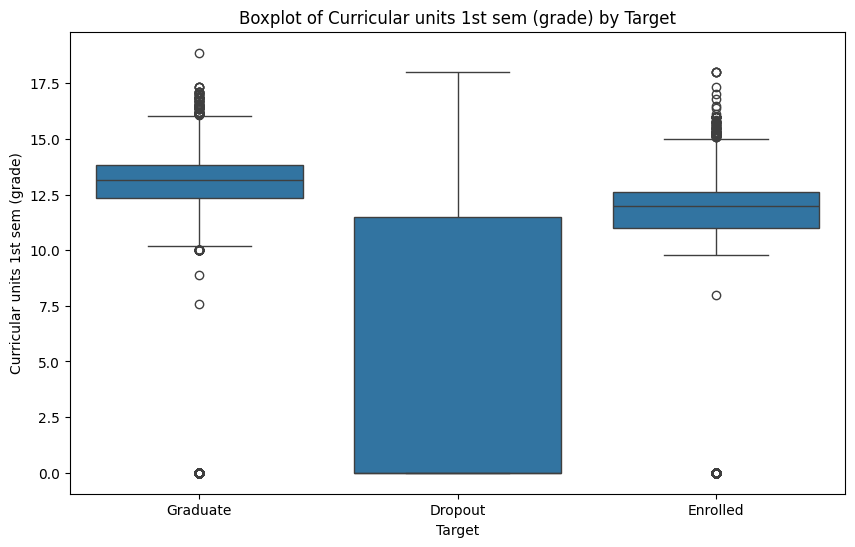

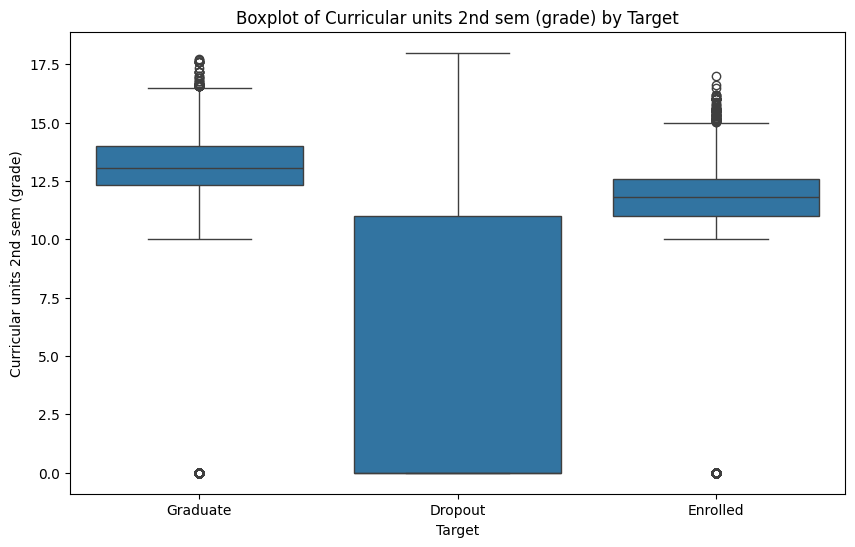

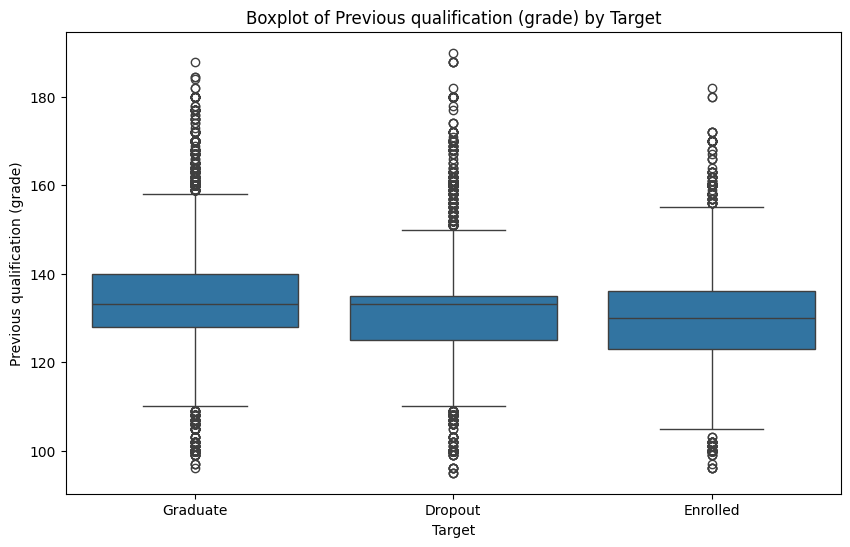

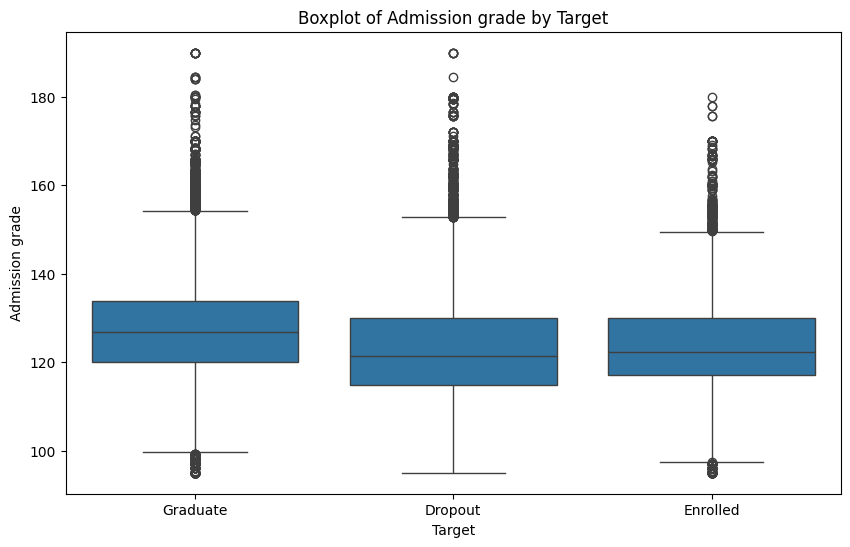

In [ ]:
for col in num_float_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Target'], y=col, data=df)
    plt.title(f'Boxplot of {col} by Target')
    plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import f
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe and 'Target' is the name of your target variable
target_column = 'Target'  # Replace with the actual name of your target column

num_float_col = ['GDP','Inflation rate','Unemployment rate','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Previous qualification (grade)','Admission grade']

# Function to perform F-test (ANOVA) and calculate critical F-value
def perform_anova(df, target_column, num_float_col):
    results = {}
    for col in num_float_col:
        groups = [df[col][df[target_column] == level] for level in df[target_column].unique()]
        f_val, p_val = f_oneway(*groups)
        df_between = len(df[target_column].unique()) - 1
        df_within = len(df) - len(df[target_column].unique())
        critical_f_val = f.ppf(0.95, df_between, df_within)
        results[col] = (f_val, p_val, critical_f_val)
    return results

# Perform ANOVA test
anova_results = perform_anova(df, target_column, num_float_col)

# Determine which variables have a significant effect (commonly p < 0.05)
significant_effects = {col: (f, p, crit) for col, (f, p, crit) in anova_results.items() if p < 0.05}

# Print the results
print("ANOVA Test Results (F-Values, P-Values, Critical F-Values):")
for col, (f, p, crit) in anova_results.items():
    print(f"{col}: F-Value = {f}, P-Value = {p}, Critical F-Value = {crit}")

print("\nVariables with significant effects on the target variable (p < 0.05):")
for col, (f, p, crit) in significant_effects.items():
    print(f"{col}: F-Value = {f}, P-Value = {p}, Critical F-Value = {crit}")




ANOVA Test Results (F-Values, P-Values, Critical F-Values):
GDP: F-Value = 438.63516148871474, P-Value = 3.863215984938129e-190, Critical F-Value = 2.995849566261223
Inflation rate: F-Value = 57.24523829706375, P-Value = 1.436449986160818e-25, Critical F-Value = 2.995849566261223
Unemployment rate: F-Value = 142.71454662436307, P-Value = 1.3651412119580873e-62, Critical F-Value = 2.995849566261223
Curricular units 1st sem (grade): F-Value = 34578.96699025098, P-Value = 0.0, Critical F-Value = 2.995849566261223
Curricular units 2nd sem (grade): F-Value = 49461.25651416838, P-Value = 0.0, Critical F-Value = 2.995849566261223
Previous qualification (grade): F-Value = 1024.8689910421017, P-Value = 0.0, Critical F-Value = 2.995849566261223
Admission grade: F-Value = 1305.2842399119272, P-Value = 0.0, Critical F-Value = 2.995849566261223

Variables with significant effects on the target variable (p < 0.05):
GDP: F-Value = 438.63516148871474, P-Value = 3.863215984938129e-190, Critical F-Value

All float variables significantly impact the target variables

## Analysing Numerical int variables

In [ ]:
num_int_col

['Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)']

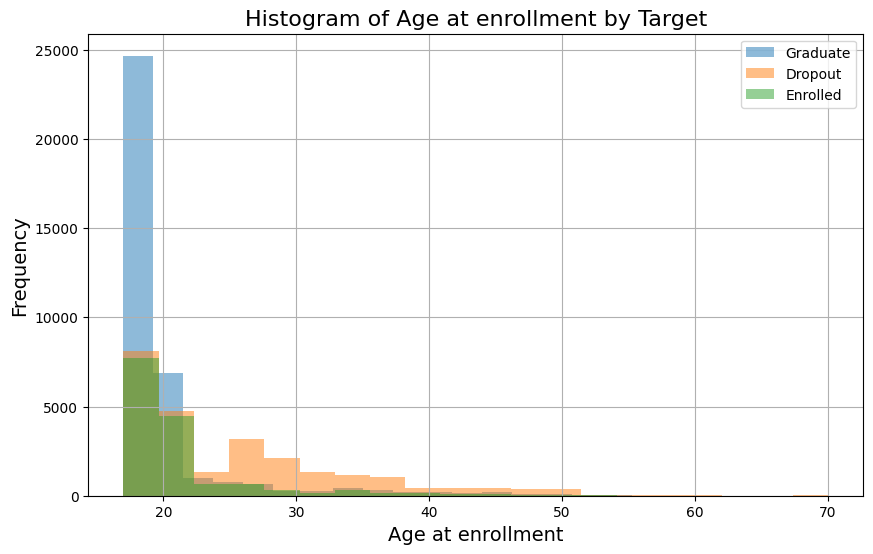

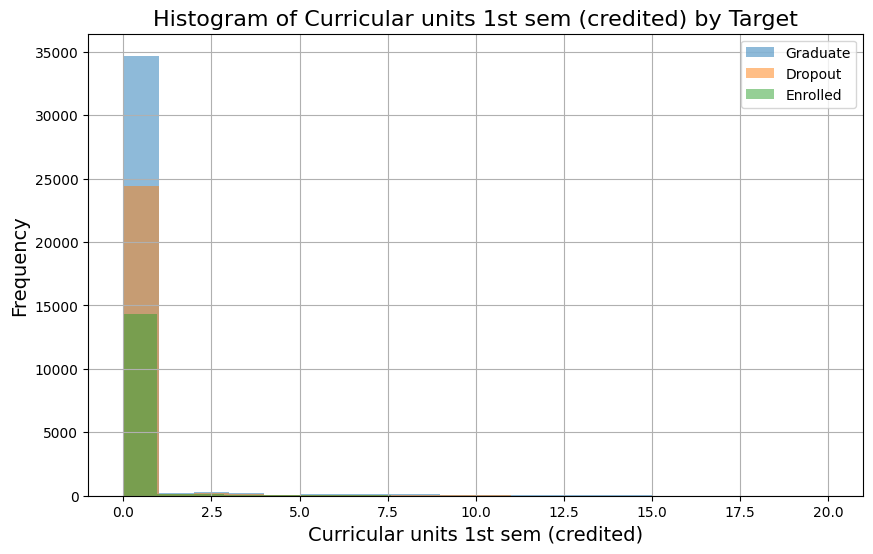

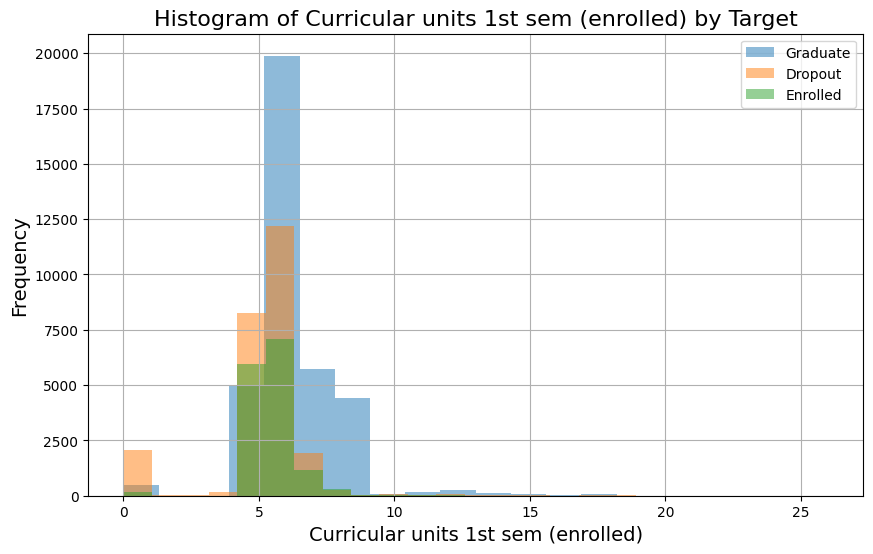

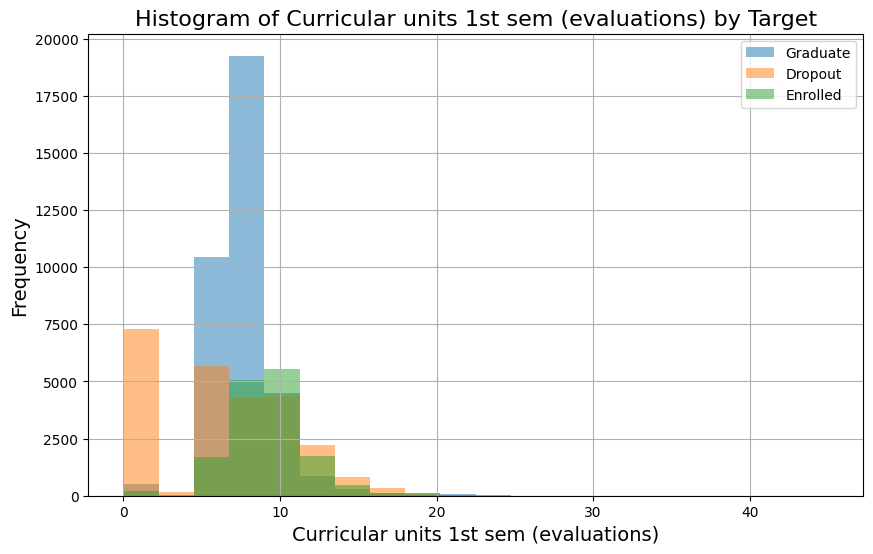

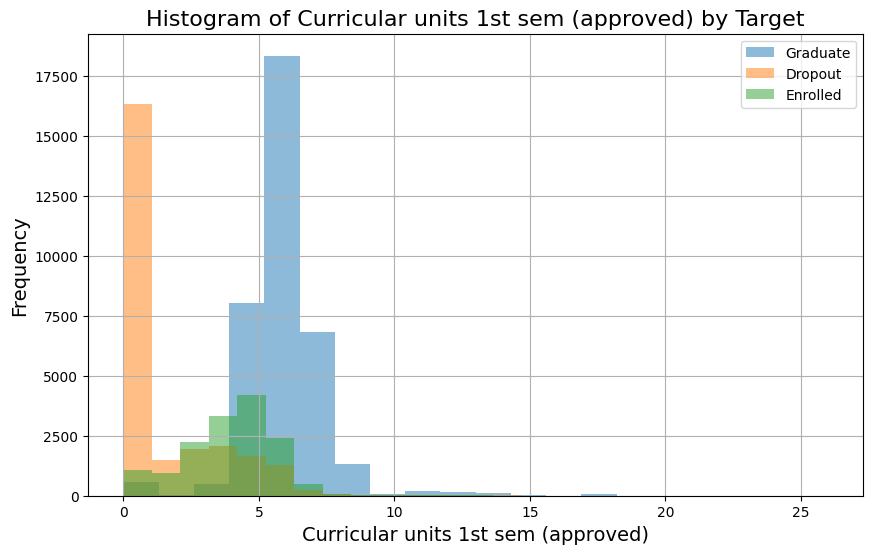

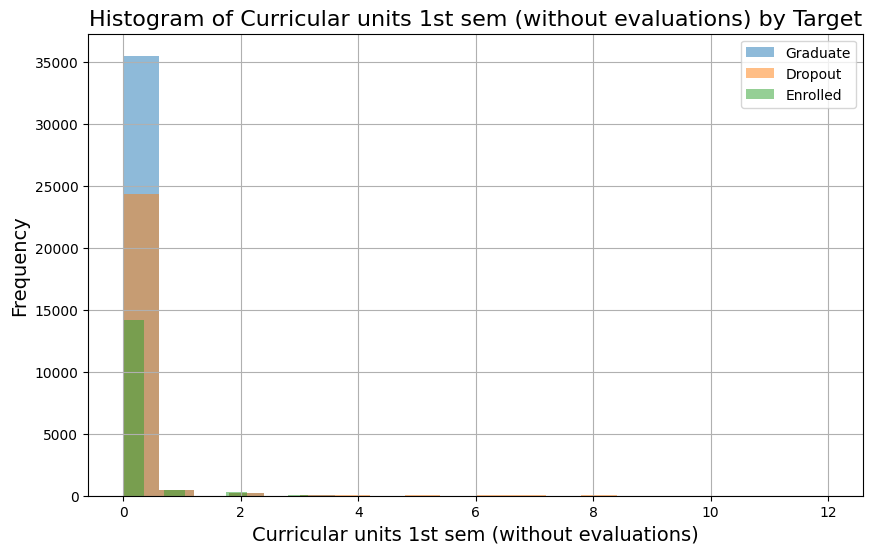

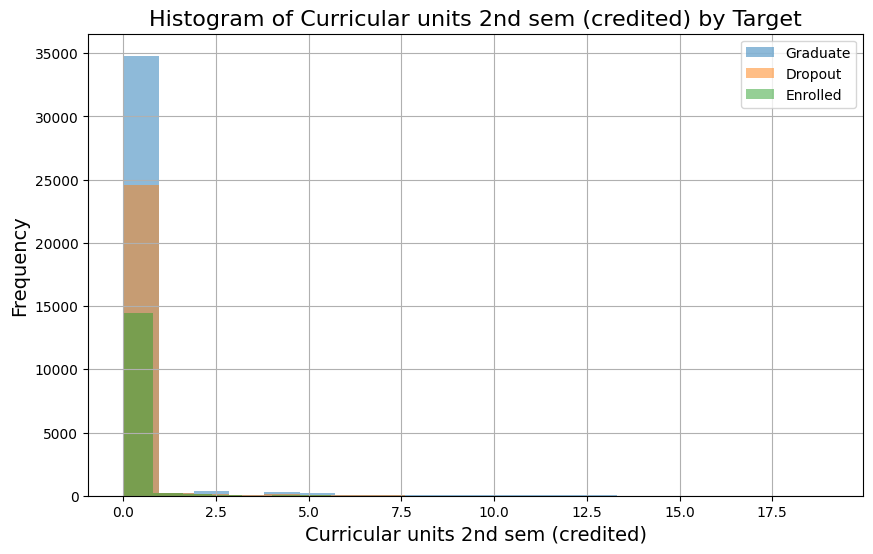

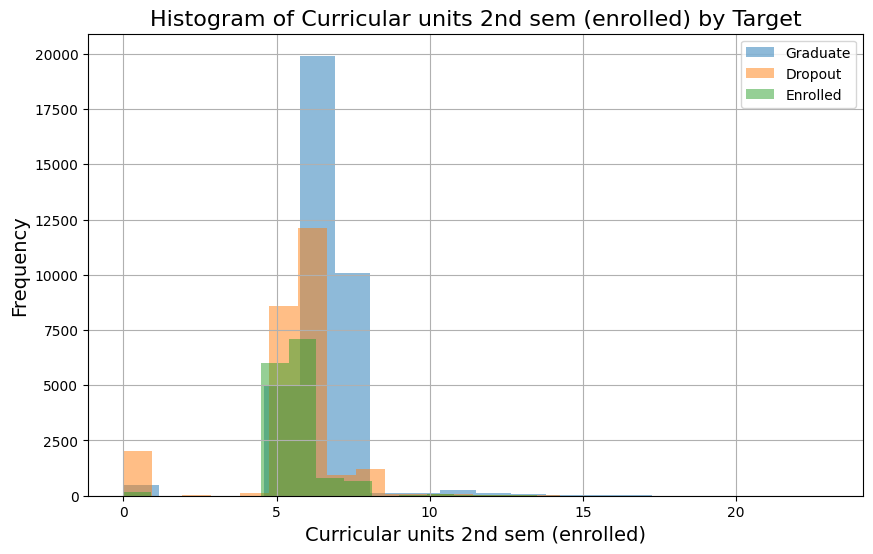

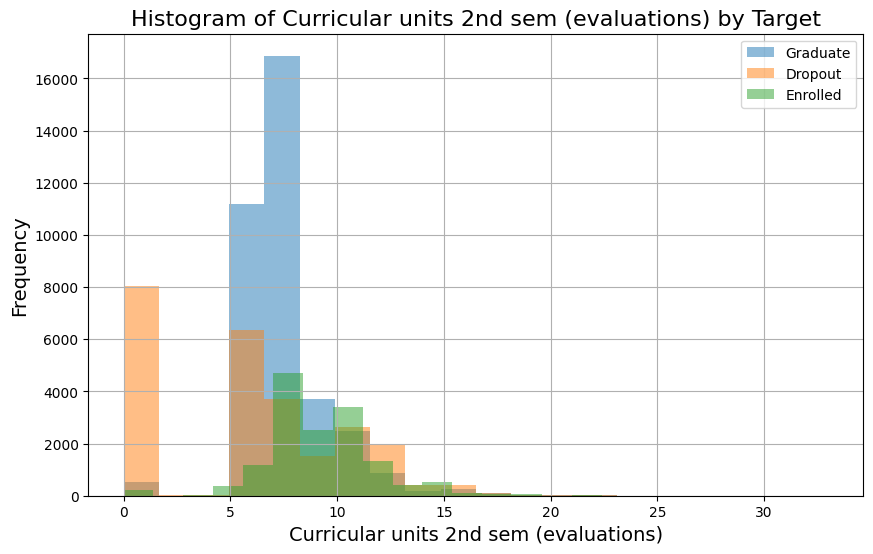

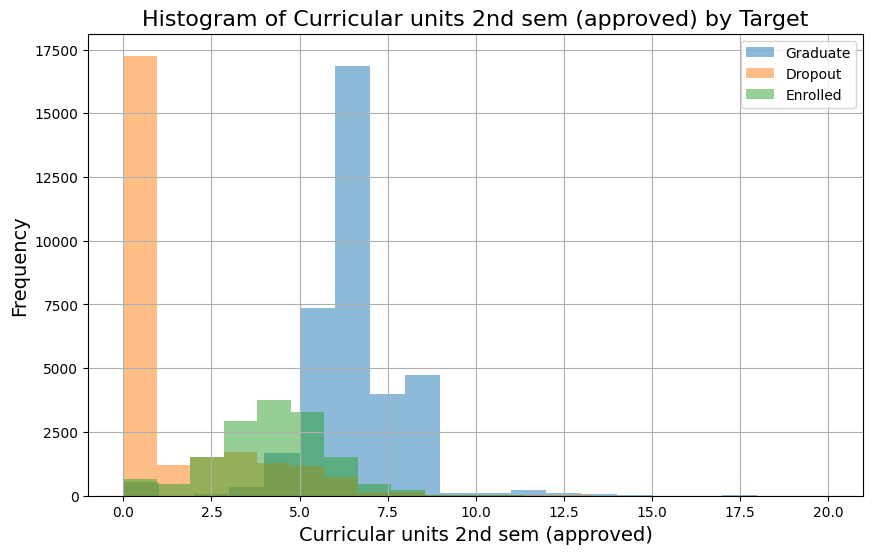

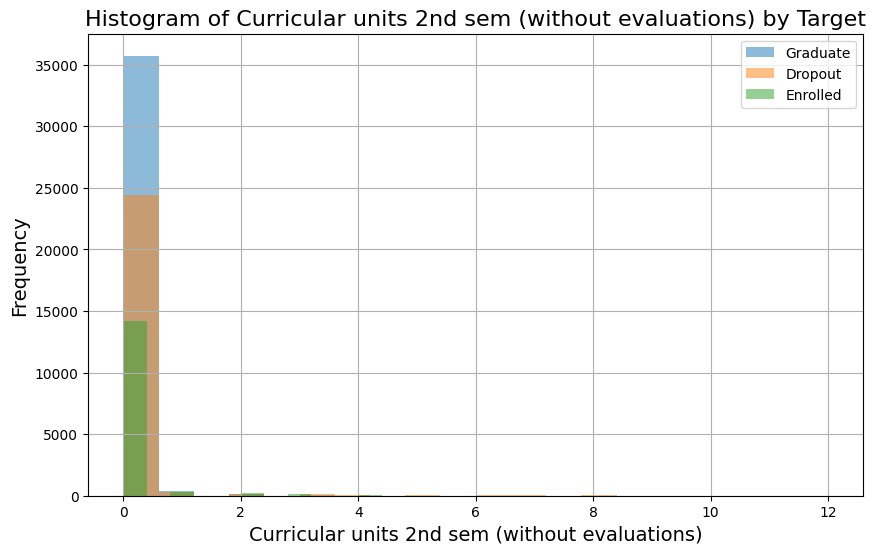

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
numerical_columns = num_int_col
# Plot grouped histograms for numerical variables based on the target variable
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    for category in df['Target'].unique():
        plt.hist(df[col][df['Target'] == category], bins=20, alpha=0.5, label=category)
    plt.title(f'Histogram of {col} by Target', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming df is your dataframe with the target variable (categorical) and independent variables (discrete integers)

# Split data into train and test sets
X = df[num_int_col]  # Independent variables
y = df['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Print coefficient magnitudes and p-values
coef_magnitudes = np.abs(model.coef_)
# p_values = model.coef_pvalues_[0]

print("Coefficients Magnitudes:")
for i, var in enumerate(num_int_col):
    print(f"{var}: {coef_magnitudes[0][i]}")

# print("\nP-values:")
# for i, var in enumerate(num_int_col):
#     print(f"{var}: {p_values[i]}")

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Coefficients Magnitudes:
Age at enrollment: 0.0323672306445198
Curricular units 1st sem (credited): 0.08074047425879725
Curricular units 1st sem (enrolled): 0.13099043216591869
Curricular units 1st sem (evaluations): 0.0048365571189979
Curricular units 1st sem (approved): 0.2958195344759994
Curricular units 1st sem (without evaluations): 0.03671585282073087
Curricular units 2nd sem (credited): 0.2376799397432577
Curricular units 2nd sem (enrolled): 0.35829155419208314
Curricular units 2nd sem (evaluations): 0.024230421110332665
Curricular units 2nd sem (approved): 0.6204360822481298
Curricular units 2nd sem (without evaluations): 0.02753997600052953

Accuracy: 0.7969811813904861

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.85      0.82      0.83      5028
    Enrolled       0.60      0.45      0.51      3017
    Graduate       0.82      0.93      0.87      7259

    accuracy                           0.80     15304
   macro avg    

In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df is your dataframe with the target variable (categorical) and independent variables (discrete integers)
num_int_col = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
               'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
               'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
               'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
               'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']

# Split data into train and test sets
X = df[num_int_col]  # Independent variables
y = df['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit multinomial logistic regression model using statsmodels
model = sm.MNLogit(y_train, X_train_sm).fit()

# Print model summary, including p-values for coefficients
print(model.summary())

# Extract p-values for each coefficient
p_values = model.pvalues
coefficients = model.params

# Print coefficients and their p-values
print("\nCoefficients and p-values:")
for i in range(len(p_values.columns)):
    print(f"Feature: {p_values.columns[i]}")
    for j in range(len(p_values)):
        print(f"  Coefficient for category {j}: {coefficients.iloc[j, i]}, p-value: {p_values.iloc[j, i]}")

# Predict on test set
y_pred_prob = model.predict(X_test_sm)
y_pred = y_pred_prob.idxmax(axis=1)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.525414
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                 Target   No. Observations:                61214
Model:                        MNLogit   Df Residuals:                    61190
Method:                           MLE   Df Model:                           22
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                  0.4940
Time:                        12:06:40   Log-Likelihood:                -32163.
converged:                       True   LL-Null:                       -63567.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               Target=Enrolled       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                               

ValueError: Mix of label input types (string and number)

In [ ]:
#For till i use all the int variables

## Analysing categorical variables

In [ ]:
cat_col

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

In [ ]:
# Extract the target variable
target = df['Target']

# Get the one-hot encoded categorical columns
categorical_columns = cat_col

# Perform Chi-Square test for each one-hot encoded feature
chi_square_results = {}
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], target)

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Collect results
    chi_square_results[col] = p

# Filter significant effects (commonly p < 0.05)
significant_effects = {col: p for col, p in chi_square_results.items() if p < 0.05}

# Print results
print("Chi-Square Test Results (P-Values):")
for col, p_value in chi_square_results.items():
    print(f"{col}: {p_value}")

print("\nSignificant categorical features affecting the target variable:")
for col, p_value in significant_effects.items():
    print(f"{col}: {p_value}")

Chi-Square Test Results (P-Values):
Marital status: 0.0
Application mode: 0.0
Application order: 0.0
Course: 0.0
Daytime/evening attendance: 7.26910032868006e-285
Previous qualification: 0.0
Nacionality: 1.6170407486823142e-06
Mother's qualification: 0.0
Father's qualification: 0.0
Mother's occupation: 0.0
Father's occupation: 0.0
Displaced: 0.0
Educational special needs: 0.8900215041644881
Debtor: 0.0
Tuition fees up to date: 0.0
Gender: 0.0
Scholarship holder: 0.0
International: 0.7257456838845804
Target: 0.0

Significant categorical features affecting the target variable:
Marital status: 0.0
Application mode: 0.0
Application order: 0.0
Course: 0.0
Daytime/evening attendance: 7.26910032868006e-285
Previous qualification: 0.0
Nacionality: 1.6170407486823142e-06
Mother's qualification: 0.0
Father's qualification: 0.0
Mother's occupation: 0.0
Father's occupation: 0.0
Displaced: 0.0
Debtor: 0.0
Tuition fees up to date: 0.0
Gender: 0.0
Scholarship holder: 0.0
Target: 0.0


In [ ]:
df['International'].value_counts()

International
0    76011
1      507
Name: count, dtype: int64

In [ ]:
df = df.drop(columns = ['International'], axis =1 )

In [ ]:
df['Educational special needs'].value_counts()

Educational special needs
0    76232
1      286
Name: count, dtype: int64

In [ ]:
df = df.drop(columns = ['Educational special needs'], axis = 1)

# Feature Engineering and transformation

## Performance Indicators

In [ ]:
data = df.copy()

In [ ]:
data.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
data['Debtor'].value_counts()

Debtor
0    71056
1     5462
Name: count, dtype: int64

In [ ]:
data['Gender'].value_counts()

Gender
0    52352
1    24166
Name: count, dtype: int64

In [ ]:
df_test['Gender'].value_counts()

Gender
0    35049
1    15963
Name: count, dtype: int64

In [ ]:
data[['Gender','Debtor']] = data[['Gender','Debtor']].astype(bool)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
data['Age at enrollment'].value_counts()

Age at enrollment
18    22377
19    18078
20    10367
21     4516
22     1907
24     1834
25     1662
27     1544
28     1358
26     1300
23     1042
29      905
32      897
31      878
34      771
30      653
33      635
35      617
37      551
39      500
36      497
38      390
41      365
43      349
45      291
47      283
40      269
44      266
48      263
50      238
49      187
46      151
42      123
51       99
58       64
55       60
53       47
17       40
52       39
54       34
70       20
60       17
57       13
61       10
59        8
62        3
Name: count, dtype: int64

In [ ]:
data = data[['Age at enrollment']]

# Define bins of size 10
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior', 'Elderly', 'Very Old', 'Oldest', 'Centenarian']

# Create age bins with descriptive labels
data['Age_bin'] = pd.cut(data['Age at enrollment'], bins=bins, labels=labels, right=False)

print(data[['Age at enrollment', 'Age_bin']].head())

# Print the value counts for the bins
print(data['Age_bin'].value_counts())

   Age at enrollment Age_bin
0                 18    Teen
1                 18    Teen
2                 18    Teen
3                 18    Teen
4                 18    Teen
Age_bin
Teen           40495
Young Adult    26435
Adult           6389
Middle Aged     2547
Senior           602
Elderly           30
Very Old          20
Child              0
Oldest             0
Centenarian        0
Name: count, dtype: int64


<ipython-input-57-306a4bad9a62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_bin'] = pd.cut(data['Age at enrollment'], bins=bins, labels=labels, right=False)


In [ ]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit LabelEncoder on Age_bin and transform to create Age_encoded column
data['Age_encoded'] = encoder.fit_transform(data['Age_bin'])

# Display the dataframe with Age_encoded column
print(data[['Age at enrollment', 'Age_bin', 'Age_encoded']].head())

   Age at enrollment Age_bin  Age_encoded
0                 18    Teen            4
1                 18    Teen            4
2                 18    Teen            4
3                 18    Teen            4
4                 18    Teen            4


In [ ]:
df = df.drop(columns = ['Age at enrollment'], axis = 1)

In [ ]:
df['Age_encoded'] = data['Age_encoded']

In [ ]:
df['economic_stress_index'] = df['Unemployment rate'] + df['Inflation rate'] - df['GDP']

In [ ]:
df.columns

Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'C

In [ ]:
# Calculate average semester grades
data['Average_semester_grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Calculate improvement
df['Improvement'] = data['Average_semester_grade'] - df['Previous qualification (grade)']


In [ ]:
#failed
# data = data.drop(columns = ['Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], axis =1)

In [ ]:
# data['Total Credited Units'] = data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)']

In [ ]:
# data['Total Enrolled Units'] = data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)']

In [ ]:
# Failed
# data['Total Approved Units'] = data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)']
# data['Total Evaluation units'] = data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)']
# # data['Total Without Evaluation units'] = data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)']

In [ ]:
# failed
# data = data.drop(columns = ['Curricular units 1st sem (credited)',
#        'Curricular units 1st sem (enrolled)',
#        'Curricular units 1st sem (evaluations)',
#        'Curricular units 1st sem (approved)',
#        'Curricular units 1st sem (grade)',
#        'Curricular units 2nd sem (credited)',
#        'Curricular units 2nd sem (enrolled)',
#        'Curricular units 2nd sem (evaluations)',
#        'Curricular units 2nd sem (approved)',
#        'Curricular units 2nd sem (grade)'], axis = 1)

In [ ]:
# data = data.drop(columns = ['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)'], axis = 1)

In [ ]:
# data = data.drop(columns = ['Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (approved)',
#                             'Curricular units 2nd sem (approved)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)',
#                            'Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], axis = 1)

In [ ]:
# data = data.drop(columns = ['Total Credited Units','Total Enrolled Units', 'Total Approved Units','Total Evaluation units','Total Without Evaluation units'], axis = 1)

In [ ]:
# df['Total Credits Earned'] = df['Curricular units 1st sem (credited)'] + df['Curricular units 2nd sem (credited)']
# df['Total Enrolled Units'] = df['Curricular units 1st sem (enrolled)'] + df['Curricular units 2nd sem (enrolled)']
# df['Total Approved Units'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']

#not improvement


In [ ]:
# df = df.drop(columns = ['Total Credits Earned','Total Enrolled Units','Total Approved Units'])

In [ ]:
# data = data.drop(columns = ['Daytime/evening attendance','Marital status'])

In [ ]:
df[df['Target'] == 'Enrolled']

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
12,1,1,1,9853,1,1,154.0,1,37,37,...,0,6,7,4,10.750000,0,9.4,-0.8,-3.12,Enrolled
30,1,44,1,9085,1,39,140.0,1,37,37,...,0,5,12,3,12.000000,1,9.4,-0.8,-3.12,Enrolled
31,1,39,1,9119,1,1,114.0,1,37,37,...,0,5,11,2,13.000000,4,7.6,2.6,0.32,Enrolled
38,2,39,1,9853,1,12,133.1,1,37,37,...,0,6,10,5,11.000000,0,7.6,2.6,0.32,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76488,1,1,2,9773,1,1,135.0,1,3,1,...,0,6,6,6,12.333333,0,16.2,0.3,-0.92,Enrolled
76500,2,39,1,9991,0,1,120.0,1,37,19,...,0,5,8,5,12.500000,0,7.6,2.6,0.32,Enrolled
76505,1,43,1,9130,1,1,130.0,1,19,19,...,0,5,10,3,12.000000,0,9.4,-0.8,-3.12,Enrolled
76507,1,17,1,9254,1,1,118.0,1,1,38,...,0,6,12,2,10.000000,0,9.4,-0.8,-3.12,Enrolled


In [ ]:
df[df['Target'] == 'Dropout']

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.00,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.00,0,16.2,0.3,-0.92,Dropout
5,1,39,1,171,1,19,133.1,1,19,19,...,0,0,0,0,0.00,0,13.9,-0.3,0.79,Dropout
8,1,39,1,9003,1,1,133.1,1,19,19,...,0,6,10,0,0.00,0,16.2,0.3,-0.92,Dropout
10,1,17,1,9238,1,1,120.0,1,1,38,...,0,6,0,0,0.00,0,11.1,0.6,2.02,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76493,1,1,1,9085,1,1,127.0,1,19,19,...,0,5,5,0,0.00,0,10.8,1.4,1.74,Dropout
76496,1,1,1,9773,1,1,129.0,1,37,37,...,0,6,12,1,10.00,0,10.8,1.4,1.74,Dropout
76502,2,39,1,9853,1,1,133.1,1,37,37,...,0,7,7,1,11.00,0,11.1,0.6,2.02,Dropout
76504,1,1,2,9773,1,1,132.0,1,37,37,...,0,6,8,4,11.75,0,12.7,3.7,-1.70,Dropout


In [ ]:
df[df['Target'] == 'Graduate']

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
6,1,44,1,9085,1,39,130.0,1,37,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,1,1,1,9773,1,1,130.0,1,19,37,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
9,1,1,6,9500,1,1,135.0,1,37,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76511,1,17,1,9773,1,1,138.0,1,1,19,...,0,6,6,6,13.000000,0,12.4,0.5,1.79,Graduate
76512,1,1,1,9238,1,1,134.0,1,19,38,...,0,6,6,6,12.166667,0,7.6,2.6,0.32,Graduate
76513,1,17,1,9254,1,1,121.0,1,19,1,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,1,1,6,9254,1,1,125.0,1,1,38,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# df = df.drop(columns = ['Nacionality'], axis = 1)

In [ ]:
df['Curricular units 1st sem (enrolled)'].describe()

count    76518.000000
mean         5.891516
std          1.671776
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         26.000000
Name: Curricular units 1st sem (enrolled), dtype: float64

# Modeling

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Initialize and train the CatBoost model
# catboost_model = CatBoostClassifier(iterations=1500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
# catboost_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_catboost = catboost_model.predict(X_test)

# # Evaluate the CatBoost model
# catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
# catboost_classification_report = classification_report(y_test, y_pred_catboost)

# print(f'CatBoost Accuracy: {catboost_accuracy}')
# print(f'Classification Report:\n{catboost_classification_report}')
# CatBoost Accuracy: 0.826494162746123
# Classification Report:
#               precision    recall  f1-score   support

#      Dropout       0.89      0.83      0.86      7589
#     Enrolled       0.65      0.59      0.62      4482
#     Graduate       0.85      0.92      0.88     10885

#     accuracy                           0.83     22956
#    macro avg       0.80      0.78      0.79     22956
# weighted avg       0.82      0.83      0.82     22956

In [ ]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
# import xgboost as xgb
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Define the base models
# base_models = [
#     ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)),
#     ('catboost', CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10, random_state=42, verbose=0)),
#     ('xgb', xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42))
# ]

# # Define the meta-model
# meta_model = LogisticRegression()

# # Define the stacking ensemble model
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# # Train the stacking model
# stacking_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_stacking = stacking_model.predict(X_test)

# # Evaluate the stacking model
# stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
# stacking_classification_report = classification_report(y_test, y_pred_stacking)

# print(f'Stacking Ensemble Model Accuracy: {stacking_accuracy}')
# print(f'Classification Report:\n{stacking_classification_report}')

# Stacking Ensemble Model Accuracy: 0.829804844049486
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.89      0.83      0.86      7589
#            1       0.65      0.60      0.62      4482
#            2       0.85      0.92      0.89     10885

#     accuracy                           0.83     22956
#    macro avg       0.80      0.78      0.79     22956
# weighted avg       0.83      0.83      0.83     22956


In [ ]:
# # Load the test dataset
# test_data = pd.read_csv('/content/drive/MyDrive/Academic Success/test.csv')

# # Extract the test IDs
# test_ids = test_data['id']

# # Select the features from the test dataset
# X_test = test_data[feature_columns]

# # Scale numerical features in the test dataset
# X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# # Make predictions on the test data
# test_predictions = stacking_model.predict(X_test)

# # Inverse transform the encoded labels to original labels
# test_predictions = label_encoder.inverse_transform(test_predictions)

# # Create a DataFrame for the submission
# submission = pd.DataFrame({'id': test_ids, 'Target': test_predictions})

# # Save the submission DataFrame to a CSV file
# submission.to_csv('/content/drive/MyDrive/Academic Success/submission1.csv', index=False)

# print("Submission file created successfully.")


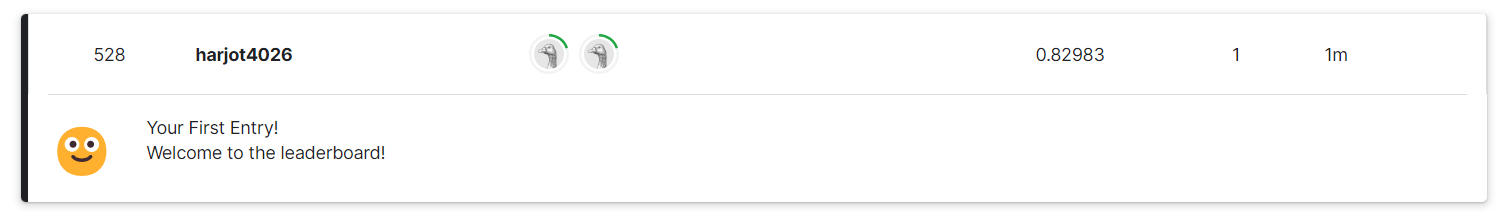

## Catboost Algo 1

In [ ]:

# Assuming df is your dataframe with the target variable (categorical) and one-hot encoded categorical columns

# Split data into train and test sets
X = df.drop(columns=['Target'])  # Independent variables (drop the target column)
y = df['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=1500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_classification_report = classification_report(y_test, y_pred_catboost)

print(f'CatBoost Accuracy: {catboost_accuracy}')
print(f'Classification Report:\n{catboost_classification_report}')


CatBoost Accuracy: 0.8359905906952431
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.67      0.61      0.64      3017
    Graduate       0.86      0.93      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



### testing on catboost algo 1

In [ ]:
df_test = df_test.drop(columns=['Educational special needs','International'], axis = 1)

In [ ]:
pred = catboost_model.predict(df_test)
pred

array([['Dropout'],
       ['Graduate'],
       ['Graduate'],
       ...,
       ['Dropout'],
       ['Dropout'],
       ['Dropout']], dtype=object)

In [ ]:
pred = pred.reshape(-1)

In [ ]:
a = pd.DataFrame({
    'id': df_test['id'],
    'Target' : pred
})

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      51012 non-null  int64 
 1   Target  51012 non-null  object
dtypes: int64(1), object(1)
memory usage: 797.2+ KB


In [ ]:
a.to_csv('Submission5.csv', index = False)

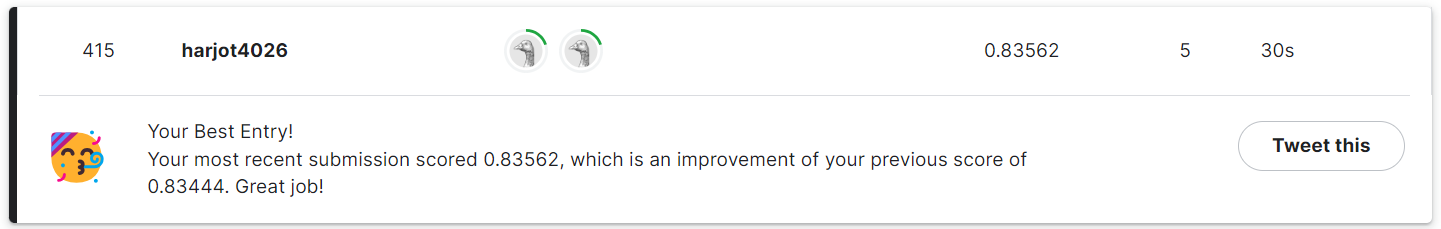

## Catboost Algo 2

In [ ]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (withou

In [ ]:

# Assuming df is your dataframe with the target variable (categorical) and one-hot encoded categorical columns

# Split data into train and test sets
X = df.drop(columns=['Target'])  # Independent variables (drop the target column)
y = df['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=1500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_classification_report = classification_report(y_test, y_pred_catboost)

print(f'CatBoost Accuracy: {catboost_accuracy}')
print(f'Classification Report:\n{catboost_classification_report}')


CatBoost Accuracy: 0.8359905906952431
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.67      0.61      0.64      3017
    Graduate       0.86      0.93      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



## XGBoost Algo

In [ ]:
mapping = { 'Dropout': 0, 'Enrolled' : 1, 'Graduate': 2}


In [ ]:
# # Split data into train and test sets
# X = df.drop(columns=['Target'])  # Independent variables (drop the target column)
# y = df['Target'].map(mapping)  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # Initialize and train the XGBoost model
# xgboost_model = XGBClassifier(n_estimators = 3880, max_leaves = 4, min_child_weight = 128.0, learning_rate = 0.06817789816303006,
#                               subsample =  0.9532899747831587, colsample_bylevel= 0.8736430736639198,
#                               colsample_bytree= 0.5471453760567322, reg_alpha= 0.7450727293631558,
#                               reg_lambda = 0.22556285205407797, random_state=42)
# xgboost_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_xgboost = xgboost_model.predict(X_test)

# # Evaluate the XGBoost model
# xgboost_accuracy = accuracy_score(y_test, y_pred_xgboost)
# xgboost_classification_report = classification_report(y_test, y_pred_xgboost)

# print(f'XGBoost Accuracy: {xgboost_accuracy}')
# print(f'Classification Report:\n{xgboost_classification_report}')

# XGBoost Accuracy: 0.8352718243596445
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.90      0.84      0.87      5028
#            1       0.67      0.61      0.64      3017
#            2       0.86      0.93      0.89      7259

#     accuracy                           0.84     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.84      0.83     15304

XGBoost Accuracy: 0.8352718243596445
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5028
           1       0.67      0.61      0.64      3017
           2       0.86      0.93      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



### testing on XGBoost

In [ ]:
# mapping1 = { 0:'Dropout', 1: 'Enrolled', 2: 'Graduate'}


In [ ]:
# pred1 = xgboost_model.predict(df_test)
# pred1

array([0, 2, 2, ..., 0, 0, 0])

In [ ]:
# b = pd.DataFrame({
#     'id': df_test['id'],
#     'Target': pred1
# })

In [ ]:
# b['Target'] = b['Target'].map(mapping1)

In [ ]:
# b.to_csv('submission6.csv', index = False)

## Catboost on Total Curricular Units





In [ ]:
#  # Not improvement
# # Assuming df is your dataframe with the target variable (categorical) and one-hot encoded categorical columns

# # Split data into train and test sets
# X = data.drop(columns=['Target'])  # Independent variables (drop the target column)
# y = data['Target']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the CatBoost model
# catboost_model = CatBoostClassifier(iterations=1500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
# catboost_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_catboost = catboost_model.predict(X_test)

# # Evaluate the CatBoost model
# catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
# catboost_classification_report = classification_report(y_test, y_pred_catboost)

# print(f'CatBoost Accuracy: {catboost_accuracy}')
# print(f'Classification Report:\n{catboost_classification_report}')

# CatBoost Accuracy: 0.8335075797177208
# Classification Report:
#               precision    recall  f1-score   support

#      Dropout       0.90      0.83      0.87      5028
#     Enrolled       0.66      0.61      0.63      3017
#     Graduate       0.86      0.93      0.89      7259

#     accuracy                           0.83     15304
#    macro avg       0.80      0.79      0.80     15304
# weighted avg       0.83      0.83      0.83     15304


CatBoost Accuracy: 0.8335075797177208
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.87      5028
    Enrolled       0.66      0.61      0.63      3017
    Graduate       0.86      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



## Catboost after removing Nacionality , daytime /evening

In [ ]:
# # Split data into train and test sets
# X = data.drop(columns=['Target'])  # Independent variables (drop the target column)
# y = data['Target']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = CatBoostClassifier(random_seed = 350, iterations=500)

# #fitting the train data
# model.fit(X_train, y_train,verbose=False)

# # Making Prediction
# cat_predict = model.predict(X_test)

#  #Evaluation

# print("Accuracy Score: ", accuracy_score(y_test, cat_predict))
# # print("F1-Score: ", f1_score(y_test, cat_predict, average= None))
# print(classification_report(y_test, cat_predict))

# Accuracy Score:  0.8022085729221119
#               precision    recall  f1-score   support

#      Dropout       0.89      0.82      0.85      5028
#     Enrolled       0.60      0.53      0.56      3017
#     Graduate       0.82      0.90      0.86      7259

#     accuracy                           0.80     15304
#    macro avg       0.77      0.75      0.76     15304
# weighted avg       0.80      0.80      0.80     15304

Accuracy Score:  0.8022085729221119
              precision    recall  f1-score   support

     Dropout       0.89      0.82      0.85      5028
    Enrolled       0.60      0.53      0.56      3017
    Graduate       0.82      0.90      0.86      7259

    accuracy                           0.80     15304
   macro avg       0.77      0.75      0.76     15304
weighted avg       0.80      0.80      0.80     15304



## catboost after removing the without evaluations

In [ ]:
# # Split data into train and test sets
# X = data.drop(columns=['Target'])  # Independent variables (drop the target column)
# y = data['Target']  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = CatBoostClassifier(random_seed = 350, iterations=500)

# #fitting the train data
# model.fit(X_train, y_train,verbose=False)

# # Making Prediction
# cat_predict = model.predict(X_test)

#  #Evaluation

# print("Accuracy Score: ", accuracy_score(y_test, cat_predict))
# # print("F1-Score: ", f1_score(y_test, cat_predict, average= None))
# print(classification_report(y_test, cat_predict))

# Accuracy Score:  0.8357945635128071
#               precision    recall  f1-score   support

#      Dropout       0.90      0.84      0.87      5028
#     Enrolled       0.67      0.62      0.64      3017
#     Graduate       0.86      0.93      0.89      7259

#     accuracy                           0.84     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.84      0.83     15304

Accuracy Score:  0.8357945635128071
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.67      0.62      0.64      3017
    Graduate       0.86      0.93      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



### testing on test data

In [ ]:
# df_test = df_test.drop(columns = ['Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], axis =1)

In [ ]:
# pred2 = model.predict(df_test)
# pred2 = pred2.reshape(-1)
# pred2

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [ ]:
# c = pd.DataFrame({
#     'id': df_test['id'],
#     'Target': pred2
# })

In [ ]:
# c.to_csv('Submission6.csv', index = False)

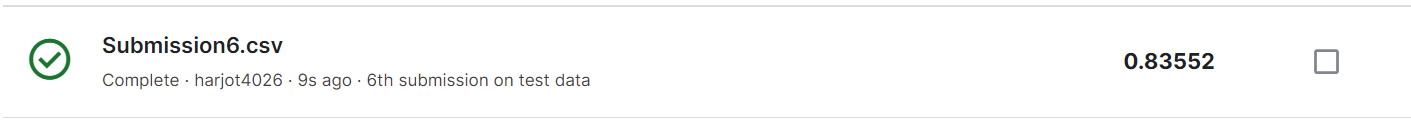

# Ensemble model after removing the two columns

In [ ]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
# import xgboost as xgb
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.model_selection import train_test_split

# # Assuming 'data' is your DataFrame with features and 'Target' column

# # Split data into train and test sets
# X = data.drop(columns=['Target'])  # Independent variables (drop the target column)
# y = data['Target']  # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the base models
# base_models = [
#     ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)),
#     ('catboost', CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10, random_state=42, verbose=0)),
#     ('xgb', xgb.XGBClassifier(
#         grow_policy='depthwise',
#         tree_method='hist',
#         enable_categorical=True,
#         gamma=1,
#         n_estimators=1300,
#         learning_rate=0.026111403303690425,
#         max_depth=10,
#         reg_lambda=23.648168065161098,
#         min_child_weight=1.0626186255116183,
#         subsample=0.8580490989206254,
#         colsample_bytree=0.5125814118774029
#     ))
# ]

# # Define the meta-model
# meta_model = LogisticRegression()

# # Define the stacking ensemble model
# stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# # Train the stacking model
# stacking_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_stacking = stacking_model.predict(X_test)

# # Evaluate the stacking model
# stacking_accuracy = accuracy_score(y_test, y_pred_stacking)
# stacking_classification_report = classification_report(y_test, y_pred_stacking)

# print(f'Stacking Ensemble Model Accuracy: {stacking_accuracy}')
# print(f'Classification Report:\n{stacking_classification_report}')

# Stacking Ensemble Model Accuracy: 0.8353371667537899
# Classification Report:
#               precision    recall  f1-score   support

#      Dropout       0.90      0.84      0.87      5028
#     Enrolled       0.66      0.62      0.64      3017
#     Graduate       0.86      0.92      0.89      7259

#     accuracy                           0.84     15304
#    macro avg       0.81      0.79      0.80     15304
# weighted avg       0.83      0.84      0.83     15304


Stacking Ensemble Model Accuracy: 0.8353371667537899
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.84      0.87      5028
    Enrolled       0.66      0.62      0.64      3017
    Graduate       0.86      0.92      0.89      7259

    accuracy                           0.84     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.84      0.83     15304



# DL model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming df is your dataframe
X = data.drop(columns=['Target'])
y = data['Target']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the target variable
y_one_hot = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_encoded), y=y_encoded)
class_weights_dict = dict(enumerate(class_weights))

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(ELU())
model.add(Dense(3, activation='softmax'))

# Compile the model with learning rate 0.01
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))


Epoch 1/500
1531/1531 [==============================] - 9s 5ms/step - loss: 0.6532 - accuracy: 0.7656 - val_loss: 0.4969 - val_accuracy: 0.8067
Epoch 2/500
1531/1531 [==============================] - 5s 3ms/step - loss: 0.6390 - accuracy: 0.7686 - val_loss: 0.5465 - val_accuracy: 0.8138
Epoch 3/500
1531/1531 [==============================] - 5s 3ms/step - loss: 0.6448 - accuracy: 0.7696 - val_loss: 0.5160 - val_accuracy: 0.8089
Epoch 4/500
1531/1531 [==============================] - 3s 2ms/step - loss: 0.6363 - accuracy: 0.7753 - val_loss: 0.5272 - val_accuracy: 0.8085
Epoch 5/500
1531/1531 [==============================] - 2s 2ms/step - loss: 0.6368 - accuracy: 0.7742 - val_loss: 0.5676 - val_accuracy: 0.8002
Epoch 6/500
1531/1531 [==============================] - 3s 2ms/step - loss: 0.6541 - accuracy: 0.7703 - val_loss: 0.5220 - val_accuracy: 0.8063
Epoch 7/500
1531/1531 [==============================] - 3s 2ms/step - loss: 0.6412 - accuracy: 0.7753 - val_loss: 0.6236 - val_ac

# XGBoost with best parameters

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report



# Assuming df_train is already defined and includes 'Target'
X = df.drop('Target', axis=1)
y = df['Target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit the LabelEncoder to your target variable and transform it
y_encoded = label_encoder.fit_transform(y)


# Verify the mapping
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)  # This will print: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}



# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Parameters

xgboost_params = {
    'grow_policy': 'depthwise',
    'tree_method': 'hist',
    'enable_categorical': True,
    'gamma': 1,
    'n_estimators': 1300,
    'learning_rate': 0.026111403303690425,
    'max_depth': 10,
    'reg_lambda': 23.648168065161098,
    'min_child_weight': 1.0626186255116183,
    'subsample': 0.8580490989206254,
    'colsample_bytree': 0.5125814118774029
    }

# Initialize XGBoost classifier with the provided parameters
model = xgb.XGBClassifier(**xgboost_params)


# Train the model
model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)


# To make predictions on validation set
predictions = model.predict(X_valid)

# Decode predictions back to original labels
predictions_decoded = label_encoder.inverse_transform(predictions)

# Decode y_valid back to original labels for classification report
y_valid_decoded = label_encoder.inverse_transform(y_valid)

# Evaluate accuracy on validation set
accuracy = accuracy_score(y_valid_decoded, predictions_decoded)
print(f"Accuracy: {accuracy:.4f}")

# Print validation score
validation_score = model.score(X_valid, y_valid)
print(f"Validation Score: {validation_score:.4f}")

# Print classification report
classification_rep = classification_report(y_valid_decoded, predictions_decoded, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_rep)

Label mapping: {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
[0]	validation_0-mlogloss:1.07688
[1]	validation_0-mlogloss:1.05619
[2]	validation_0-mlogloss:1.03602
[3]	validation_0-mlogloss:1.01764
[4]	validation_0-mlogloss:0.99949
[5]	validation_0-mlogloss:0.98354
[6]	validation_0-mlogloss:0.96598
[7]	validation_0-mlogloss:0.95018
[8]	validation_0-mlogloss:0.93475
[9]	validation_0-mlogloss:0.92250
[10]	validation_0-mlogloss:0.90937
[11]	validation_0-mlogloss:0.89492
[12]	validation_0-mlogloss:0.88077
[13]	validation_0-mlogloss:0.86749
[14]	validation_0-mlogloss:0.85484
[15]	validation_0-mlogloss:0.84268
[16]	validation_0-mlogloss:0.83141
[17]	validation_0-mlogloss:0.82077
[18]	validation_0-mlogloss:0.81027
[19]	validation_0-mlogloss:0.79987
[20]	validation_0-mlogloss:0.78923
[21]	validation_0-mlogloss:0.77938
[22]	validation_0-mlogloss:0.76969
[23]	validation_0-mlogloss:0.76022
[24]	validation_0-mlogloss:0.75181
[25]	validation_0-mlogloss:0.74300
[26]	validation_0-mlogloss:0.73483
[27]	

# Catboost on new features addition like Age_encoded, stress index , improvement

In [ ]:

# Assuming df is your dataframe with the target variable (categorical) and one-hot encoded categorical columns

# Split data into train and test sets
X = df.drop(columns=['Target'])  # Independent variables (drop the target column)
y = df['Target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=1500, learning_rate=0.05, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
catboost_classification_report = classification_report(y_test, y_pred_catboost)

print(f'CatBoost Accuracy: {catboost_accuracy}')
print(f'Classification Report:\n{catboost_classification_report}')


CatBoost Accuracy: 0.8336382645060115
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.90      0.83      0.87      5028
    Enrolled       0.66      0.61      0.63      3017
    Graduate       0.86      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.81      0.79      0.80     15304
weighted avg       0.83      0.83      0.83     15304



# SMOTE

In [ ]:
# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Train the CatBoost model on the resampled data
# catboost_model.fit(X_resampled, y_resampled)
# y_pred_catboost = catboost_model.predict(X_test)

# # Evaluate the model
# catboost_accuracy = accuracy_score(y_test, y_pred_catboost)
# catboost_classification_report = classification_report(y_test, y_pred_catboost)

# print(f'CatBoost Accuracy: {catboost_accuracy}')
# print(f'Classification Report:\n{catboost_classification_report}')

# CatBoost Accuracy: 0.8318086774699425
# Classification Report:
#               precision    recall  f1-score   support

#      Dropout       0.91      0.83      0.86      5028
#     Enrolled       0.64      0.65      0.64      3017
#     Graduate       0.87      0.91      0.89      7259

#     accuracy                           0.83     15304
#    macro avg       0.80      0.80      0.80     15304
# weighted avg       0.83      0.83      0.83     15304
